In [169]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

<h1>Checkpoint 2</h1>

<h3>Checkpoint 2.a - Data preprocessing</h3>

In [173]:
# Load and convert types
# (a) Import
# (b) Parse

car_sales_df = pd.read_csv("car_sales_data.csv")
display(car_sales_df.head())
# car_sales_df[["make", "model"]] = car_sales_df[["Manufacturer", "Model", "Fuel type"]].astype("string")
display(car_sales_df.dtypes)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [174]:
# Data Testing/Cleaning
display(car_sales_df.isna().sum())

display(car_sales_df[car_sales_df.isna().any(axis=1)].head())

car_sales_df = car_sales_df.dropna()

# Convert sale date to datetime object

car_sales_df["saledate"] = pd.to_datetime(
    car_sales_df["saledate"].str.split(" \(").str[0],  # apply split elementwise
    format="%a %b %d %Y %H:%M:%S GMT%z",
    utc=True
)

# Cars are released in the previous year
car_sales_df["year"] = pd.to_datetime(car_sales_df["year"] - 1, format="%Y", utc=True)

display(car_sales_df)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
14,2014,Chevrolet,Cruze,2LT,Sedan,automatic,1g1pe5sbxe7120097,ca,NaN,15686.0,blue,black,avis rac/san leandro,13900.0,10600.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
16,2015,Hyundai,Sonata,SE,Sedan,automatic,5npe24af4fh001562,ca,NaN,8311.0,red,—,avis tra,15200.0,4200.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
22,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,NaN,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
25,2015,Hyundai,Sonata,SE,Sedan,automatic,5npe24af4fh038482,ca,NaN,9281.0,silver,gray,enterprise vehicle exchange / tra / rental / t...,15150.0,8500.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
28,2014,BMW,X5,sDrive35i,SUV,automatic,5uxkr2c52e0h33130,ca,NaN,11278.0,gray,black,avis rac/san leandro,50400.0,34000.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2014-01-01 00:00:00+00:00,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 20:30:00+00:00
1,2014-01-01 00:00:00+00:00,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 20:30:00+00:00
2,2013-01-01 00:00:00+00:00,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 12:30:00+00:00
3,2014-01-01 00:00:00+00:00,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 12:30:00+00:00
4,2013-01-01 00:00:00+00:00,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 20:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2010-01-01 00:00:00+00:00,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,2015-07-07 13:15:00+00:00
558833,2011-01-01 00:00:00+00:00,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,2015-07-08 16:30:00+00:00
558834,2011-01-01 00:00:00+00:00,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,2015-07-08 16:30:00+00:00
558835,2014-01-01 00:00:00+00:00,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,2015-07-09 13:45:00+00:00


<h3>Checkpoint 2.b - Basic data exploration and summary statistics</h3>

**#1 - Sumary Statistics**

We will provide descriptive statistics about the dataframe as well as visualizations for the numerical values.

From our analysis we can see that there are 472,325 entries in the dataset, representing 53 different manufacturers with a total of 768 models. The most popular car in the dataset is the Nisaan Altima with 16,346 entries.

Our visualizations show us that most numerical values are right skewed, except for year of manufacture, which is left-skewed. Price is the most right-skewed metric in the set. We have plotted the 25th, 75th, and 99th percentiles along with the mean to illustrate this.

In [177]:
# Describe the dataframe
car_sales_df.describe()

,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000
mean,30.774177,66701.732040,13837.058964,13690.512058
std,13.286866,51939.586894,9532.229273,9613.033738
min,1.000000,1.000000,25.000000,1.000000
25%,24.000000,28137.000000,7425.000000,7200.000000
50%,35.000000,51085.000000,12300.000000,12200.000000
75%,41.000000,96590.000000,18300.000000,18200.000000
max,49.000000,999999.000000,182000.000000,230000.000000


In [178]:
# Number of different manufacturers and their representation in the dataset
print(f"Number of Manufacturers:")
display(len(car_sales_df["make"].unique()))

print("\nCount of Models by Manufacturers:")
display(car_sales_df.groupby('make')["model"].unique())

print("\nNumber of Unique Car Models:")
display(len(car_sales_df["model"].unique()))

print("\nMost Popular Model")
display(car_sales_df.groupby("model")["make"].count().idxmax(), car_sales_df.groupby("model")["make"].count().max())

Number of Manufacturers:


53


Count of Models by Manufacturers:


make
Acura            [ILX, MDX, TSX, TL, RDX, ZDX, RSX, RL, CL, Int...
Aston Martin                             [V8 Vantage, DB9, Rapide]
Audi             [A4, A6, Q5, A3, SQ5, S5, A8, TTS, S4, A7, A5,...
BMW              [3 Series, 6 Series Gran Coupe, M5, 6 Series, ...
Bentley          [Continental GT Speed, Continental Flying Spur...
Buick            [Enclave, LaCrosse, Rendezvous, LeSabre, Centu...
Cadillac         [ELR, SRX, Escalade, CTS Coupe, Escalade ESV, ...
Chevrolet        [Cruze, Camaro, Impala, Suburban, Malibu, Silv...
Chrysler         [200, 300, Town and Country, Sebring, PT Cruis...
Daewoo                                                    [Nubira]
Dodge            [Avenger, Journey, Charger, Grand Caravan, Nit...
FIAT                                             [500, 500L, 500e]
Ferrari                        [California, F430, 360, 458 Italia]
Fisker                                                     [Karma]
Ford             [Fusion, Escape, Edge, Focus, F-350 Supe


Number of Unique Car Models:


768


Most Popular Model


'Altima'

16346

In [180]:
car_sales_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2014-01-01 00:00:00+00:00,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 20:30:00+00:00
1,2014-01-01 00:00:00+00:00,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 20:30:00+00:00
2,2013-01-01 00:00:00+00:00,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 12:30:00+00:00
3,2014-01-01 00:00:00+00:00,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 12:30:00+00:00
4,2013-01-01 00:00:00+00:00,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 20:30:00+00:00


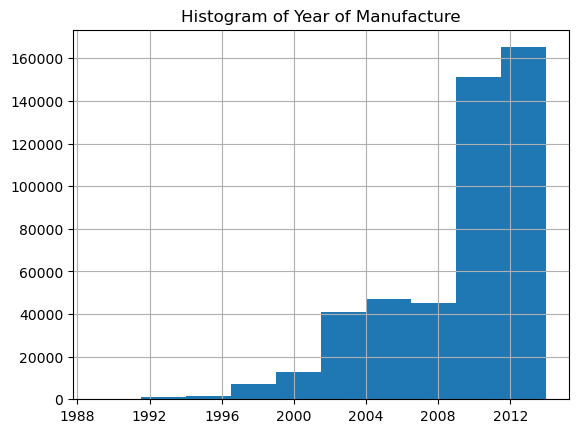

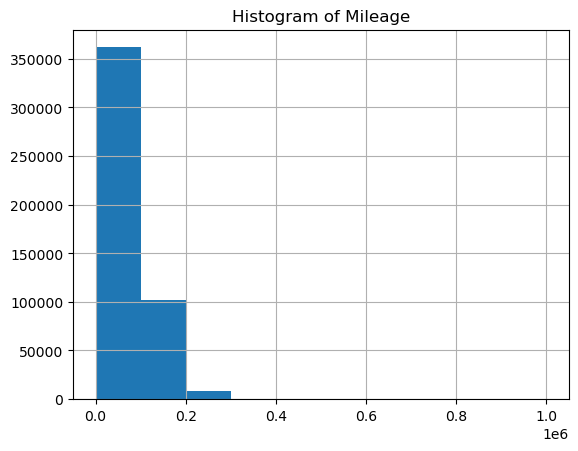

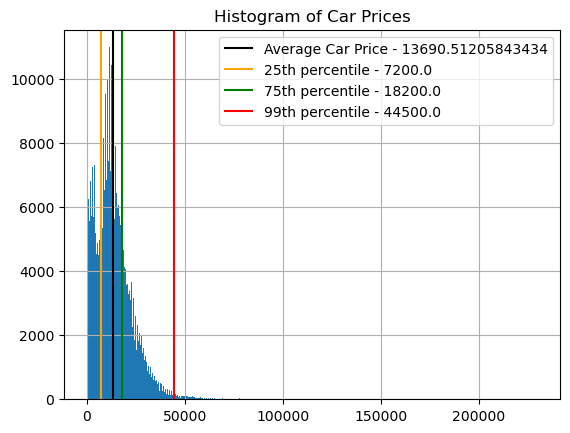

In [181]:
# Histograms of numerical data
# car_sales_df["Engine size"].hist()
# plt.title("Histogram of Engine Sizes")
# plt.show()

car_sales_df["year"].hist()
plt.title("Histogram of Year of Manufacture")
plt.show()

car_sales_df["odometer"].hist()
plt.title("Histogram of Mileage")
plt.show()

# The pretty plot
car_sales_df["sellingprice"].hist(bins=int(math.sqrt(car_sales_df["sellingprice"].size)))
plt.axvline(car_sales_df["sellingprice"].mean(), label=f"Average Car Price - {car_sales_df['sellingprice'].mean()}", color="black")
plt.axvline(car_sales_df["sellingprice"].quantile(.25), label=f"25th percentile - {car_sales_df['sellingprice'].quantile(.25)}", color="orange")
plt.axvline(car_sales_df["sellingprice"].quantile(.75), label=f"75th percentile - {car_sales_df['sellingprice'].quantile(.75)}", color="green")
plt.axvline(car_sales_df["sellingprice"].quantile(.99), label=f"99th percentile - {car_sales_df['sellingprice'].quantile(.99)}", color="red")
plt.title("Histogram of Car Prices")
plt.legend()
plt.show()

**#1 - The Relationship Between Age-at-sale and Selling Price**

We investigate if there is a significant linear relationship between milleage at Age-at-sale and selling price. We stratify by manufacturer to control for a potential confounding variable.

h0 : Average selling price for each manufacturer does not get lower as the car ages</br>
ha : Average selling price for each manufacturer does not get lower as the car ages

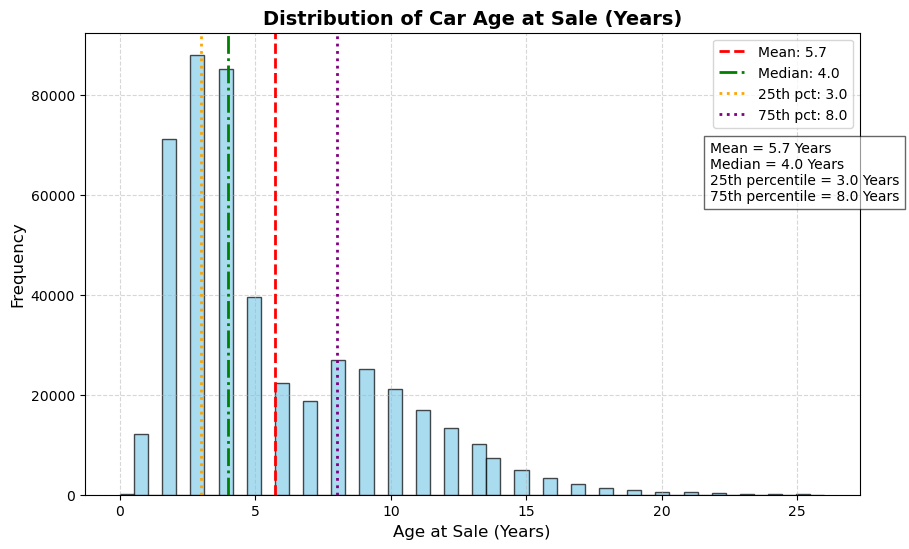

In [208]:
# Lets start by creating and visualizing our data
car_sales_df["age_at_sale"] = car_sales_df["saledate"] - car_sales_df["year"]

ages = (car_sales_df["age_at_sale"].dt.days / 365.25).astype(int)

# Compute statistics
mean_val = ages.mean()
median_val = ages.median()
p25 = ages.quantile(0.25)
p75 = ages.quantile(0.75)

# Create histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(ages, bins=50, color="skyblue", edgecolor="black", alpha=0.7)

# Add vertical lines for key stats
ax.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_val:.1f}")
ax.axvline(median_val, color="green", linestyle="-.", linewidth=2, label=f"Median: {median_val:.1f}")
ax.axvline(p25, color="orange", linestyle=":", linewidth=2, label=f"25th pct: {p25:.1f}")
ax.axvline(p75, color="purple", linestyle=":", linewidth=2, label=f"75th pct: {p75:.1f}")

# Customize plot
ax.set_title("Distribution of Car Age at Sale (Years)", fontsize=14, fontweight="bold")
ax.set_xlabel("Age at Sale (Years)", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()

# Display summary stats below the chart
summary_text = (
    f"Mean = {mean_val:.1f} Years\n"
    f"Median = {median_val:.1f} Years\n"
    f"25th percentile = {p25:.1f} Years\n"
    f"75th percentile = {p75:.1f} Years"
)
plt.figtext(0.75, 0.6, summary_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

In [ ]:
grouped_by_make = car_sales_df.groupby("make")